# S10 T01: Aprenentage Supervisat  - Classificació

**Objectius:**
 - Arbres de classificació
 - KNN - k-Nearest Neighbors
 - Regressió Logística
 - Support Vector Machine
 - XGboost

## Exercise 1:

Create at least three different classification models to try to best predict DelayedFlights.csv flight delay (ArrDelay). Consider whether the flight is late or not (ArrDelay> 0).

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [136]:
# We upload a sample cleaned from NaN from the Exercise S09 T01
df_sample = pd.read_csv('DelayFlightsNOPreparedDataSample.csv')

In [137]:
df_sample.shape

(20000, 27)

In [138]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               20000 non-null  int64  
 1   Month              20000 non-null  int64  
 2   DayofMonth         20000 non-null  int64  
 3   DayOfWeek          20000 non-null  int64  
 4   DepTime            20000 non-null  float64
 5   CRSDepTime         20000 non-null  int64  
 6   ArrTime            20000 non-null  float64
 7   CRSArrTime         20000 non-null  int64  
 8   UniqueCarrier      20000 non-null  object 
 9   ActualElapsedTime  20000 non-null  float64
 10  CRSElapsedTime     20000 non-null  float64
 11  AirTime            20000 non-null  float64
 12  ArrDelay           20000 non-null  float64
 13  DepDelay           20000 non-null  float64
 14  Origin             20000 non-null  object 
 15  Dest               20000 non-null  object 
 16  Distance           200

We remove some variables that only are just noise to the models as they do not have any relacion with the Arrival Delays, so we eliminate the Delay reasons (#22 to 26), cancelled, cancellationcode, diverted (#19 to 21) and the schedule variables (#5,7 & 10)

In [139]:
df_all_columns = df_sample.columns
df_all_columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode',
       'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

In [140]:
df_column_del = ['CRSDepTime', 'CRSArrTime', 'CRSElapsedTime', 'Cancelled', 'CancellationCode',
       'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay']
df_column_del

['CRSDepTime',
 'CRSArrTime',
 'CRSElapsedTime',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [141]:
df_columns = [c for c in df_all_columns if (c not in df_column_del)]
df2 = df_sample[df_columns]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               20000 non-null  int64  
 1   Month              20000 non-null  int64  
 2   DayofMonth         20000 non-null  int64  
 3   DayOfWeek          20000 non-null  int64  
 4   DepTime            20000 non-null  float64
 5   ArrTime            20000 non-null  float64
 6   UniqueCarrier      20000 non-null  object 
 7   ActualElapsedTime  20000 non-null  float64
 8   AirTime            20000 non-null  float64
 9   ArrDelay           20000 non-null  float64
 10  DepDelay           20000 non-null  float64
 11  Origin             20000 non-null  object 
 12  Dest               20000 non-null  object 
 13  Distance           20000 non-null  int64  
 14  TaxiIn             20000 non-null  float64
 15  TaxiOut            20000 non-null  float64
dtypes: float64(8), int64(5

Before doing a Dummy Variable to convert categorical values to numeric we remove the origin and destination with less than 10 flights to reduce the number of columns with almost no information. We don´t apply the same logic to the Unique Carriers as only 1 have less than 10 flights

In [142]:
df2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
0,2008,2,24,7,1350.0,1950.0,AA,360.0,285.0,245.0,50.0,ORD,SFO,1846,9.0,66.0
1,2008,8,15,5,1444.0,1558.0,OO,74.0,54.0,3.0,9.0,SFO,ACV,250,5.0,15.0
2,2008,6,13,5,2.0,513.0,UA,311.0,292.0,-158.0,42.0,SFO,BOS,2704,7.0,12.0
3,2008,5,21,3,2316.0,2448.0,US,92.0,77.0,64.0,77.0,CLT,DTW,500,4.0,11.0
4,2008,12,5,5,951.0,1138.0,AS,107.0,88.0,64.0,66.0,SJC,PDX,569,2.0,17.0


In [143]:
df2['UniqueCarrier'].value_counts()

WN    3831
AA    1962
UA    1524
MQ    1480
OO    1369
DL    1136
US    1094
XE    1033
CO    1031
EV     818
NW     812
FL     726
YV     704
B6     592
9E     574
OH     530
AS     404
F9     275
HA      96
AQ       9
Name: UniqueCarrier, dtype: int64

In [144]:
df2['Origin'].value_counts()

ORD    1364
ATL    1350
DFW     999
DEN     746
LAX     618
       ... 
GTF       1
MEI       1
STX       1
RDD       1
PSE       1
Name: Origin, Length: 275, dtype: int64

In [145]:
df3 = df2[df2['Origin'].map(df2['Origin'].value_counts()) > 10]
df3['Origin'].value_counts()

ORD    1364
ATL    1350
DFW     999
DEN     746
LAX     618
       ... 
BZN      11
TVC      11
BIL      11
ACV      11
MYR      11
Name: Origin, Length: 145, dtype: int64

In [146]:
df3 = df3[df3['Dest'].map(df3['Dest'].value_counts()) > 10]

In [147]:
Origin_del = len(df2.groupby(df2['Origin'])) - len(df3.groupby(df3['Origin']))
Dest_del = len(df2.groupby(df2['Dest'])) - len(df3.groupby(df3['Dest']))

In [148]:
print('By deleting Origin and Dest with less than 10 trips we avoid {} additional dummy variables/columns in the model'.format((Origin_del+Dest_del)))

By deleting Origin and Dest with less than 10 trips we avoid 253 additional dummy variables/columns in the model


To use categorical models we convert the discrete numerical variable by a categorical (0/1) variable.

If a flight has been delayed (ArrDelay > 0) the ArrDelay will be 1 if not 0

In [149]:
df3['ArrDelay'] = [1 if x > 0 else 0 for x in df3['ArrDelay']]
df3['ArrDelay'].unique() # To check that all values have been converted correctly

array([1, 0], dtype=int64)

In [150]:
df3.ArrDelay.value_counts() #To check if the DF is unbalance, which is not.

1    14425
0     4474
Name: ArrDelay, dtype: int64

In [151]:
#convert all categorical variables/features in numerical
df4 = pd.get_dummies(df3)

We standarize the data frame.

In [152]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df4[['Distance', 'DepDelay', 'TaxiIn', 'TaxiOut']] = ss.fit_transform(df4[['Distance', 'DepDelay', 'TaxiIn', 'TaxiOut']])


In [153]:
df4

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,ActualElapsedTime,AirTime,ArrDelay,DepDelay,...,Dest_SWF,Dest_SYR,Dest_TLH,Dest_TPA,Dest_TUL,Dest_TUS,Dest_TVC,Dest_TYS,Dest_VPS,Dest_XNA
0,2008,2,24,7,1350.0,1950.0,360.0,285.0,1,0.122268,...,0,0,0,0,0,0,0,0,0,0
2,2008,6,13,5,2.0,513.0,311.0,292.0,0,-0.024172,...,0,0,0,0,0,0,0,0,0,0
3,2008,5,21,3,2316.0,2448.0,92.0,77.0,1,0.616502,...,0,0,0,0,0,0,0,0,0,0
4,2008,12,5,5,951.0,1138.0,107.0,88.0,1,0.415147,...,0,0,0,0,0,0,0,0,0,0
5,2008,11,7,5,1812.0,2103.0,171.0,131.0,1,0.634807,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2008,1,3,4,1926.0,2438.0,312.0,294.0,1,0.049048,...,0,0,0,0,0,0,0,0,0,0
19996,2008,1,2,3,1710.0,1926.0,136.0,107.0,0,-0.060781,...,0,0,0,0,0,0,0,0,0,0
19997,2008,7,20,7,1139.0,1233.0,54.0,30.0,0,-0.445186,...,0,0,0,0,0,0,0,0,0,0
19998,2008,2,15,5,711.0,1014.0,183.0,163.0,0,-0.683150,...,0,0,0,0,0,0,0,0,0,0


In [154]:
df4.to_csv('DelayFlightsClassificacio.csv', index=False)

## Functions definition

In [155]:
df_metrics = pd.DataFrame()

In [156]:
def Train_Test (df):
    global X, y, X_train, X_test, y_train, y_test
    #The target variable is ArrDelay 
    X = df.drop(['ArrDelay'], axis=1).values
    y = df.ArrDelay.values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    print('X Train shape: ', X_train.shape)
    print('X Test shape: ', X_test.shape)
    print('y Train shape: ', y_train.shape)
    print('y Test shape: ', y_test.shape)


In [157]:
def KNN (X_train, X_test, y_train, y_test, model_short):
    error = []
   
    # Calculating error for K values between 1 and 30
    print('First we need to select the number of neighbors that we will use in the model /n Therefore we calculate the mean error against the number of neightbors')
    for i in range(1, 30):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error.append(np.mean(pred_i != y_test))
                
    # Error Rate K value Graph
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error');
    
    # Find acceptable number of neighbors. Number has to be even to avoid a draw.
    for i in range(1, 30):
        if i > 3:
            perc_diff_error = ((np.abs(error[i] - error[(i-2)]))/error[i]*100)
            if perc_diff_error <  1: # If the error improve less than 1% it select the next even num neighbors
                if i % 2: 
                    n_neigh = i 
                else:
                    n_neigh = i + 1
                break
  
    # Fit into the model
    print ('I decide that when the mean error improve less than 1% that will indicate the of neighbors required = ', n_neigh)
    global classifier, y_pred, y_pred_prob
    classifier = KNeighborsClassifier(n_neighbors=n_neigh)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    
    y_pred_prob = classifier.predict_proba(X_test)[::,1]
    
    # Confusion Matrix
    CnfMatrix (model_short, y_test, y_pred)
    


In [158]:
def LR (X_train, X_test, y_train, y_test, model_short):
    
    # instantiate the model (using the default parameters)
    logreg = LogisticRegression(solver='newton-cg')

    # fit the model with data
    logreg.fit(X_train,y_train)

    y_pred=logreg.predict(X_test)
    
    y_pred_prob = logreg.predict_proba(X_test)[::,1]
    
    CnfMatrix (model_short, y_test, y_pred)

In [159]:
def SVM (X_train, X_test, y_train, y_test, model_short):
    #Create a svm Classifier
    clf = svm.SVC(kernel='linear') # Linear Kernel

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    CnfMatrix (model_short, y_test, y_pred)

In [160]:
def CnfMatrix (model, y_test, y_pred):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    print("F1:",metrics.f1_score(y_test, y_pred))
    print('AUC:', metrics.roc_auc_score(y_test, y_pred_prob))
    
    Accuracy = metrics.accuracy_score(y_test, y_pred)
    Precision = metrics.precision_score(y_test, y_pred)
    Recall = metrics.recall_score(y_test, y_pred)
    F1 = metrics.f1_score(y_test, y_pred)
    # AUC is the percentage of the ROC plot that is underneath the curve:
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    AUC = metrics.roc_auc_score(y_test, y_pred_prob)
    
    metric = pd.DataFrame([{'Accuracy': Accuracy, 'Precision': Precision, 'Recall': Recall, 'F1': F1, 'AUC': AUC}], index = [model])
    
    global df_metrics
    df_metrics = df_metrics.append(metric)
    df_metrics
    
    fig, ax = plt.subplots()
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label');

In [161]:
def RocCurve (y_test, y_pred_prob):
    # IMPORTANT: first argument is true values, second argument is predicted probabilities

    # we pass y_test and y_pred_prob
    # we do not use y_pred_class, because it will give incorrect results without generating an error
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)


We split the data into train and test, to split the data and have unused data to test the models.

In [162]:
#The target variable is ArrDelay 
Train_Test (df4)

X Train shape:  (14174, 332)
X Test shape:  (4725, 332)
y Train shape:  (14174,)
y Test shape:  (4725,)


### K-Nearest Neighbors Algorithmm (KNN)

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

First we need to select the number of neighbors that we will use in the model /n Therefore we calculate the mean error against the number of neightbors
I decide that when the mean error improve less than 1% that will indicate the of neighbors required =  15
Accuracy: 0.7663492063492063
Precision: 0.789279112754159
Recall: 0.9467849223946785
F1: 0.8608870967741935
AUC: 0.6835692393507316


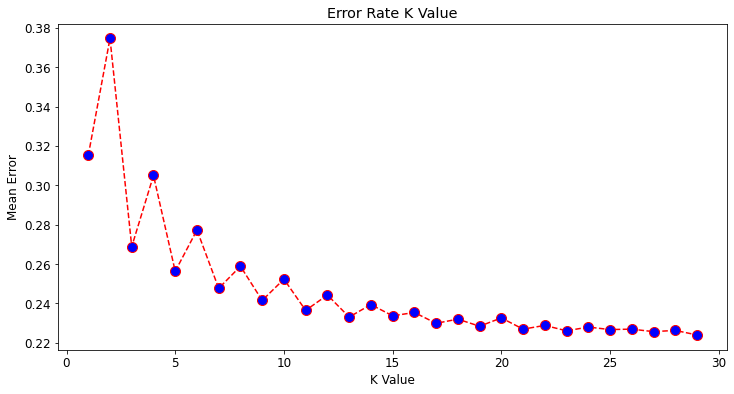

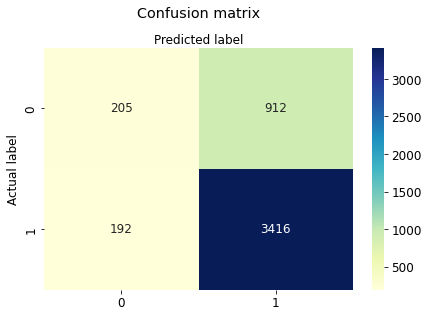

In [164]:
KNN (X_train, X_test, y_train, y_test,'KNN')

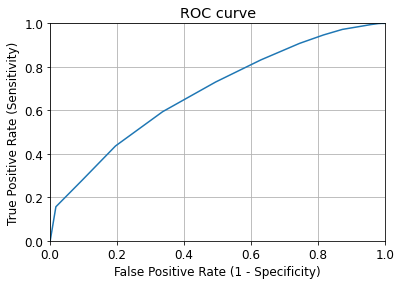

In [165]:
#ROC Curve
RocCurve (y_test, y_pred_prob)

## Logistic Regression (LR)

In [166]:
from sklearn.linear_model import LogisticRegression

Accuracy: 0.8950264550264551
Precision: 0.9081846799580273
Recall: 0.9595343680709535
F1: 0.9331536388140163
AUC: 0.6835692393507316


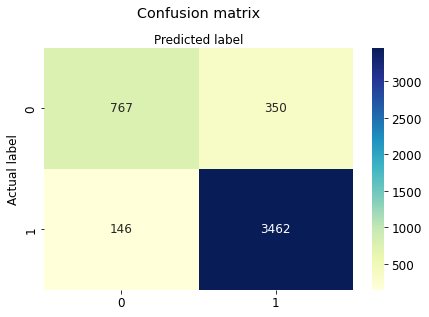

In [167]:
LR (X_train, X_test, y_train, y_test,'LR')

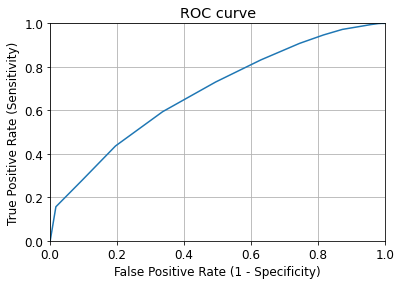

In [168]:
RocCurve (y_test, y_pred_prob)

## Support Vector Machines (SVM)

In [169]:
from sklearn import svm

Accuracy: 0.8302645502645503
Precision: 0.8388888888888889
Recall: 0.9625831485587583
F1: 0.8964894166236448
AUC: 0.6835692393507316


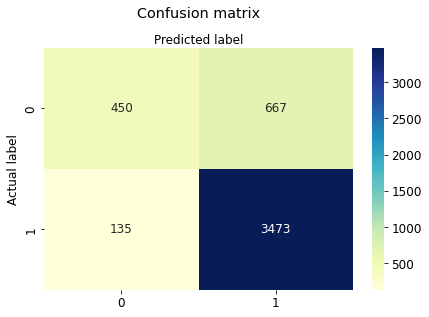

In [170]:
SVM (X_train, X_test, y_train, y_test,'SVM')

## XGBoost

In [171]:
# !pip install xgboost

In [172]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

[22:15:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 0.7663492063492063
Precision: 0.789279112754159
Recall: 0.9467849223946785
F1: 0.8608870967741935
AUC: 0.6835692393507316


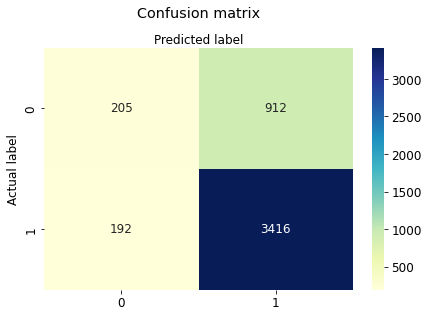

In [173]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

CnfMatrix ('XGBoost', y_test, y_pred)

In [174]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.403421


In [175]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

data_dmatrix = xgb.DMatrix(data=X,label=y)
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

cv_results.head()

[22:15:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:15:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:15:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.483898,0.000111,0.484048,0.000111
1,0.467481,0.001448,0.467926,0.001580
2,0.455362,0.002586,0.455965,0.002707
3,0.444889,0.002979,0.445630,0.003144
4,0.435967,0.002368,0.436953,0.002821


In [176]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[22:15:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


## Exercise 2:

Compare classification models using accuracy, a confidence matrix, and other more advanced metrics.

The summary of the metrics used above are the following. ROC Curves and AUC values shown in the above exercise where possible.

In [177]:
df_metrics

,Accuracy,Precision,Recall,F1,AUC
KNN,0.766349,0.789279,0.946785,0.860887,0.683569
LR,0.895026,0.908185,0.959534,0.933154,0.683569
SVM,0.830265,0.838889,0.962583,0.896489,0.683569
XGBoost,0.766349,0.789279,0.946785,0.860887,0.683569


## Exercise 3:

Train them using the different parameters they support.

### K-Nearest Neighbors Algorithmm (KNN)

Accuracy: 0.7606349206349207
Precision: 0.7932749230404925
Recall: 0.9284922394678492
F1: 0.8555740007661856
AUC: 0.6761871063408282


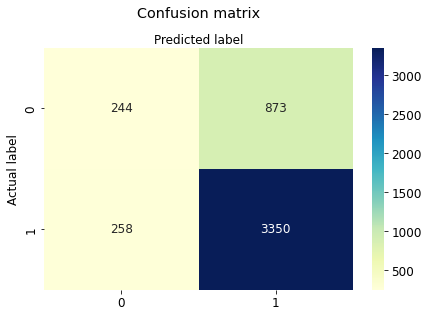

In [178]:
#We try different parameters. Less neightbors that the 'optimal' but more leafs
classifier = KNeighborsClassifier(n_neighbors=10, weights='distance', leaf_size=45, n_jobs=-1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
    
y_pred_prob = classifier.predict_proba(X_test)[::,1]
    
# Confusion Matrix
CnfMatrix ('KNN_Param1', y_test, y_pred)

### Support Vector Machines (SVM)

Accuracy: 0.7635978835978836
Precision: 0.7635978835978836
Recall: 1.0
F1: 0.8659546381855274
AUC: 0.6761871063408282


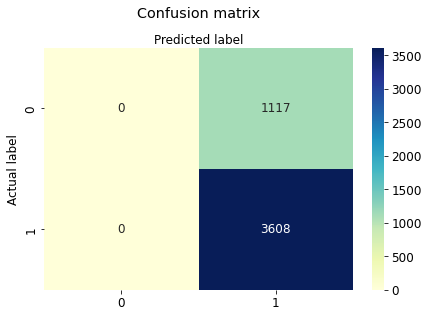

In [179]:
# In this case we modify the kernel to see how it affects the performance of the model
clf = svm.SVC(kernel='rbf')

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

CnfMatrix ('SVM_Param1', y_test, y_pred)

## Exercise 4:

Compare your performance using the traint / test or cross-validation approach.

As we have used the train-test already on Exercise 1, we all the sample. We will also run K-fold cross validation using KNN model

## Logistic Regression (LR)

Accuracy: 0.9054447325255305
Precision: 0.9152319621500854
Recall: 0.9655459272097053
F1: 0.9397159531761292
AUC: 0.9432259099174201


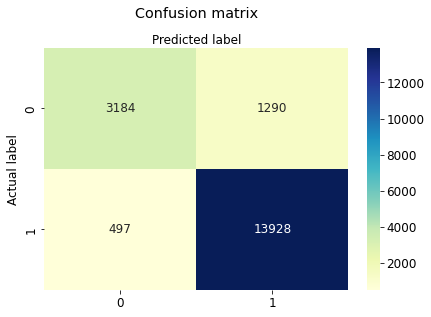

In [180]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='newton-cg')

# fit the model with data
logreg.fit(X,y)

y_pred=logreg.predict(X)
    
y_pred_prob = logreg.predict_proba(X)[::,1]
    
CnfMatrix ('LR_no_train_test', y, y_pred)

## Support Vector Machines (SVM)

Accuracy: 0.8363405471188952
Precision: 0.8436855513769259
Recall: 0.9642287694974003
F1: 0.899938533208243
AUC: 0.9432259099174201


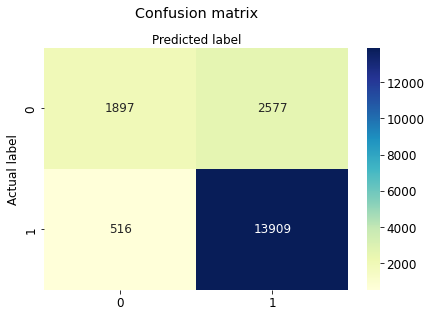

In [181]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X, y)

#Predict the response for test dataset
y_pred = clf.predict(X)

CnfMatrix ('SVM_no_train_test', y, y_pred)

### KNN using cross validation

In [182]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
#model = LogisticRegression()
# evaluate model
scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [183]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.759 (0.009)


## Exercise 5:

Perform some variable engineering process to improve prediction

We will do a PCA to reduce the large number of columns and simplify the calculations.

In [184]:
from sklearn.decomposition import PCA 

df_PCA = df4.copy()
df_PCA.shape

(18899, 333)

In [185]:
Train_Test (df_PCA)

X Train shape:  (14174, 332)
X Test shape:  (4725, 332)
y Train shape:  (14174,)
y Test shape:  (4725,)


In [186]:
pca = PCA(.99) #Normally 95% would already be a good value for the variance, but in this case we case push it to 99% of the variance
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
print ('We have {} features which have been reduced using PCA to {} maintaining the 99% of the variance'.format(len(X[1,:]), pca.n_components_))

We have 332 features which have been reduced using PCA to 2 maintaining the 99% of the variance


## K-Nearest Neighbors Algorithmm (KNN)

First we need to select the number of neighbors that we will use in the model /n Therefore we calculate the mean error against the number of neightbors
I decide that when the mean error improve less than 1% that will indicate the of neighbors required =  15
Accuracy: 0.7671957671957672
Precision: 0.7874828060522696
Recall: 0.9520509977827051
F1: 0.8619824341279799
AUC: 0.671551654832492


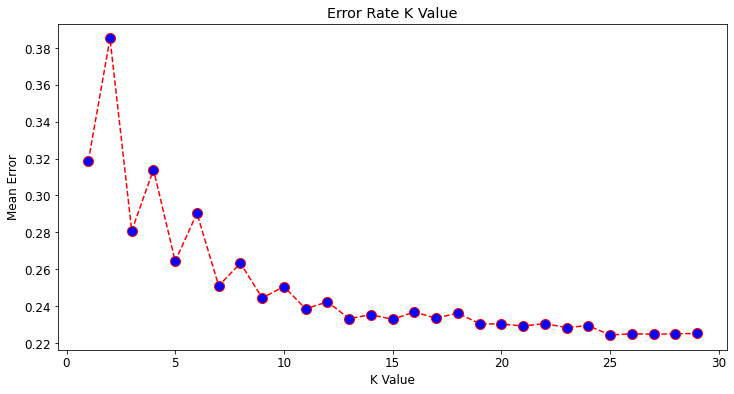

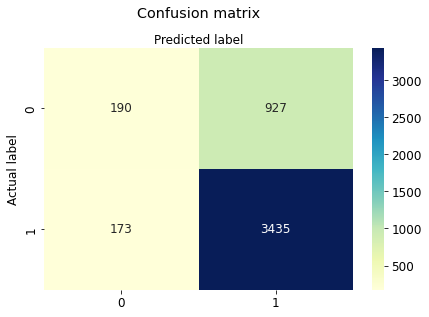

In [187]:
KNN (X_train, X_test, y_train, y_test,'KNN_PCA')

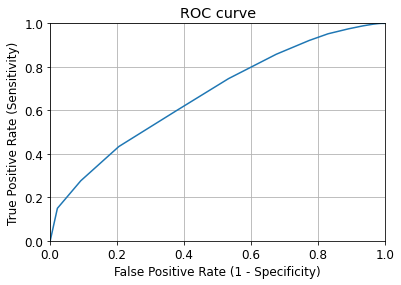

In [188]:
RocCurve (y_test, y_pred_prob)

## Logistic Regression (LR)

Accuracy: 0.7676190476190476
Precision: 0.7688517566409597
Recall: 0.9947339246119734
F1: 0.8673272112131465
AUC: 0.671551654832492


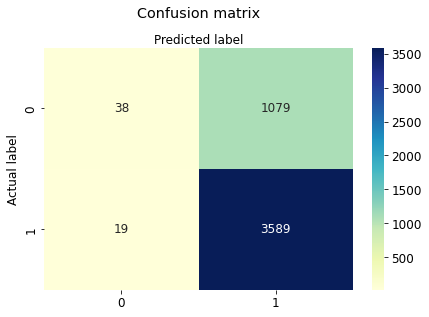

In [189]:
LR (X_train, X_test, y_train, y_test,'LR_PCA')

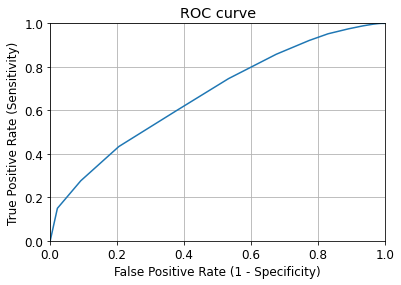

In [190]:
RocCurve (y_test, y_pred_prob)

## Exercise 6:

Do not use the DepDelay variable when making predictions

In [191]:
df5 = df4.drop(['DepDelay'], axis=1)

In [192]:
#The target variable is ArrDelay 
Train_Test (df5)

X Train shape:  (14174, 331)
X Test shape:  (4725, 331)
y Train shape:  (14174,)
y Test shape:  (4725,)


## K-Nearest Neighbors Algorithmm (KNN)

First we need to select the number of neighbors that we will use in the model /n Therefore we calculate the mean error against the number of neightbors
I decide that when the mean error improve less than 1% that will indicate the of neighbors required =  15
Accuracy: 0.7663492063492063
Precision: 0.7891454965357968
Recall: 0.9470620842572062
F1: 0.8609221466364324
AUC: 0.6843451436874587


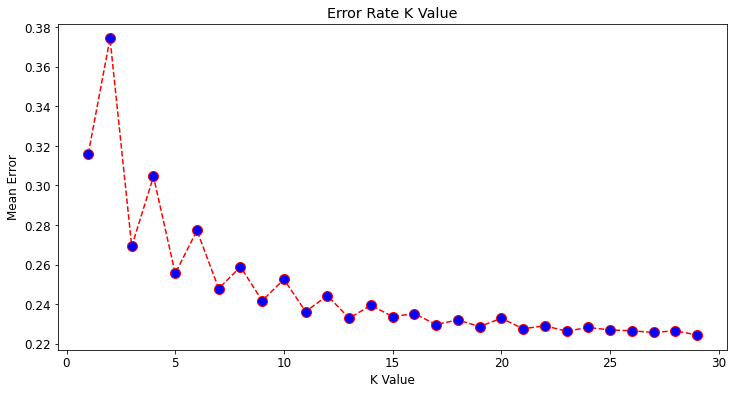

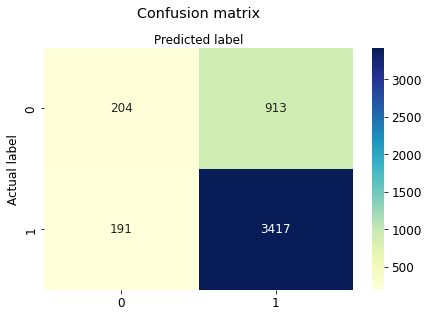

In [193]:
y_pred = KNN (X_train, X_test, y_train, y_test, 'KNN_NoDepDelay')

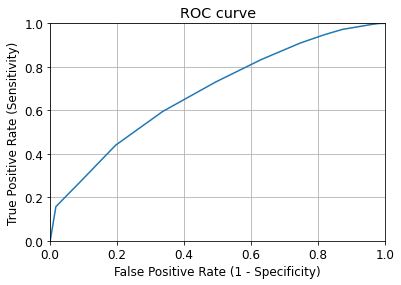

In [194]:
RocCurve (y_test, y_pred_prob)

## Logistic Regression (LR)

Accuracy: 0.8721693121693121
Precision: 0.8940188877229801
Recall: 0.9445676274944568
F1: 0.9185983827493261
AUC: 0.6843451436874587


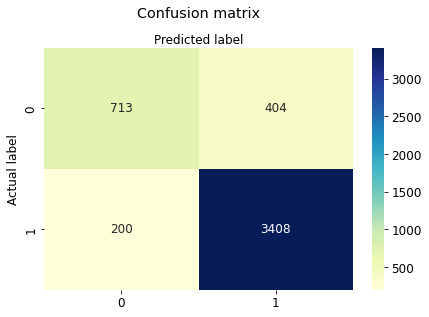

In [195]:
LR (X_train, X_test, y_train, y_test,'LR_No_DepDelay')

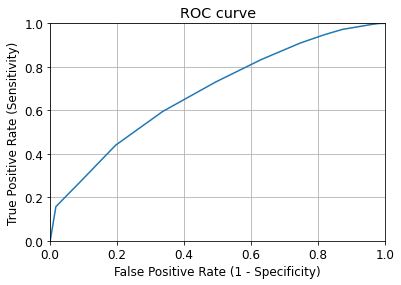

In [196]:
RocCurve (y_test, y_pred_prob)

## Support Vector Machines (SVM)

Accuracy: 0.8021164021164021
Precision: 0.8157335223245925
Recall: 0.957039911308204
F1: 0.8807550057390638
AUC: 0.6843451436874587


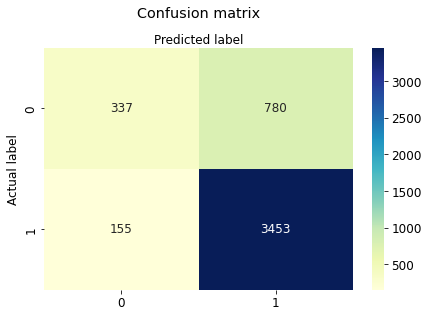

In [197]:
SVM (X_train, X_test, y_train, y_test,'SVM_NoDepDelay')

### Conclusion:

From all the methods used, it looks consistent that the Logistic Regression it always provide better results than the other methods, and would therefore be the best model to use.

In [198]:
df_metrics

,Accuracy,Precision,Recall,F1,AUC
KNN,0.766349,0.789279,0.946785,0.860887,0.683569
LR,0.895026,0.908185,0.959534,0.933154,0.683569
SVM,0.830265,0.838889,0.962583,0.896489,0.683569
XGBoost,0.766349,0.789279,0.946785,0.860887,0.683569
KNN_Param1,0.760635,0.793275,0.928492,0.855574,0.676187
SVM_Param1,0.763598,0.763598,1.000000,0.865955,0.676187
LR_no_train_test,0.905445,0.915232,0.965546,0.939716,0.943226
SVM_no_train_test,0.836341,0.843686,0.964229,0.899939,0.943226
KNN_PCA,0.767196,0.787483,0.952051,0.861982,0.671552
LR_PCA,0.767619,0.768852,0.994734,0.867327,0.671552
